## Import Libraries and Tools

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix

### Modeling Data

In [2]:
df_values = pd.read_csv('Data/train_values.csv')
df_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_labels = pd.read_csv('Data/train_labels.csv')
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
df = df_values.merge(df_labels, on='building_id')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


## First Simple Model (FSM)

For the FSM we will use just the numerical columns and are classifier we will use a Decision Tree Classifer. First things first, we need to split that train by doing a train test split.

In [5]:
X_fsm = df.drop(['building_id', 'land_surface_condition', 'foundation_type', 
         'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 
         'legal_ownership_status', 'damage_grade'], axis=1)
y_fsm = df['damage_grade']

X_train_fsm, X_test_fsm, y_train_fsm, y_test_fsm = train_test_split(X_fsm, y_fsm, random_state=42, stratify=y_fsm)

In [6]:
fsm_dt = DecisionTreeClassifier(random_state=42, )
fsm_dt.fit(X_train_fsm, y_train_fsm)

DecisionTreeClassifier(random_state=42)

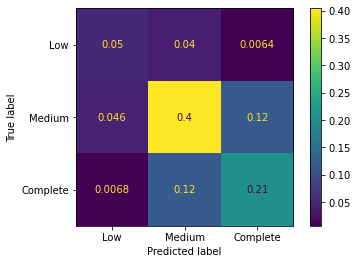

In [7]:
plot_confusion_matrix(fsm_dt, X_test_fsm, y_test_fsm, normalize='all', 
                      display_labels=['Low', 'Medium', 'Complete']);

In [8]:
y_hat_fsm = fsm_dt.predict(X_test_fsm)

In [9]:
print('  First Simple Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test_fsm, y_hat_fsm))
print('   Recall:', recall_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('Precision:', precision_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('       F1:', f1_score(y_test_fsm, y_hat_fsm, average = 'macro'))

  First Simple Model Scores
-----------------------------
 Accuracy: 0.6604503384445365
   Recall: 0.6149900294776912
Precision: 0.6073121797582424
       F1: 0.6109604665814518
